In [197]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [199]:
dict_series_main = {
    "Monthly sales of company X": sales_of_company_x.iloc[:,1],
    "Monthly Boston armed robberies": robberies_in_boston.iloc[:,1],
    "International airline passengers: monthly totals in thousands": airlines_passengers.iloc[:,1],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp.iloc[:,1],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing.iloc[:,1],
    "Daily total female births in California": female_births.iloc[:,1]
}

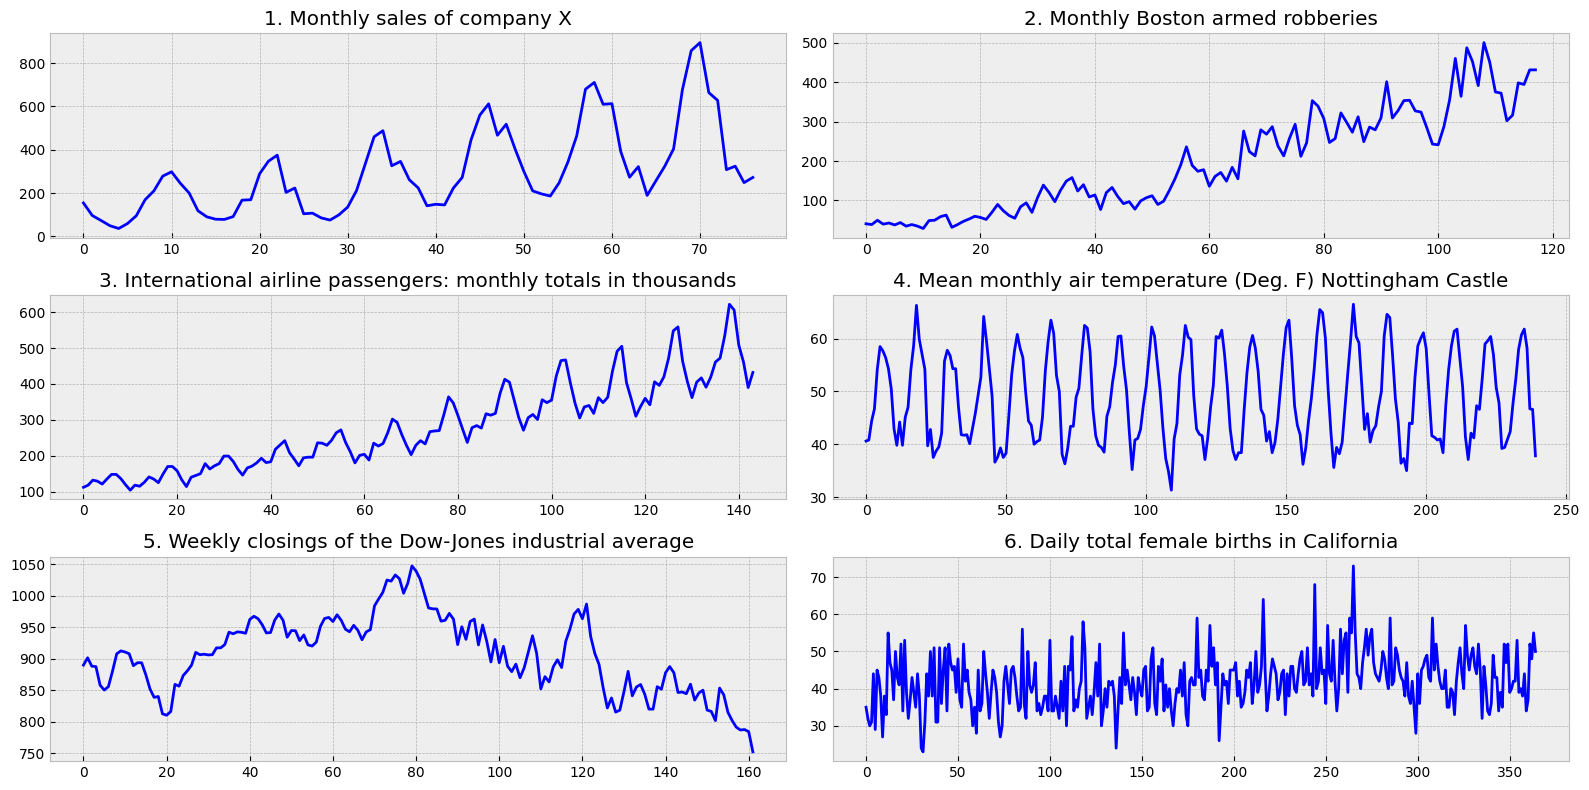

In [200]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    k = 1
    for i, key in enumerate(dict_series_main.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        dict_series_main[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(f'{k}. {key}')
        k+=1

    plt.tight_layout()

In [201]:
def test_stationarity(ts):
    p_value = adfuller(ts)[1]
    print(f'P-Value: {p_value}')
    if p_value < 0.05:
        print("Ряд стационарен.")
    else:
        print("Ряд не стационарен.")
        print('!!!')

In [202]:
def use_test(dict_):
  k = 1
  for i,j in dict_.items():
    print(k)
    k+=1
    print(i)
    test_stationarity(j)
    print('------------')

In [203]:
use_test(dict_series_main)

1
Monthly sales of company X
P-Value: 0.9888894205170052
Ряд не стационарен.
!!!
------------
2
Monthly Boston armed robberies
P-Value: 0.994277563805723
Ряд не стационарен.
!!!
------------
3
International airline passengers: monthly totals in thousands
P-Value: 0.991880243437641
Ряд не стационарен.
!!!
------------
4
Mean monthly air temperature (Deg. F) Nottingham Castle
P-Value: 0.016989030222608604
Ряд стационарен.
------------
5
Weekly closings of the Dow-Jones industrial average
P-Value: 0.6224548515589733
Ряд не стационарен.
!!!
------------
6
Daily total female births in California
P-Value: 5.2434129901498554e-05
Ряд стационарен.
------------


Временные ряды 4 и 6 стационарны, попробуем преобразовать оставшиеся, для этого продифференцируем их.

In [204]:
dict_series = dict_series_main.copy()

In [205]:
series_diff = list(dict_series.keys())[:3]
series_diff.append(list(dict_series.keys())[4])
series_diff

['Monthly sales of company X',
 'Monthly Boston armed robberies',
 'International airline passengers: monthly totals in thousands',
 'Weekly closings of the Dow-Jones industrial average']

In [206]:
for i in series_diff:
  dict_series[i] = dict_series[i].diff().dropna()

In [207]:
use_test(dict_series)

1
Monthly sales of company X
P-Value: 0.0955092507855888
Ряд не стационарен.
!!!
------------
2
Monthly Boston armed robberies
P-Value: 6.450795412686658e-11
Ряд стационарен.
------------
3
International airline passengers: monthly totals in thousands
P-Value: 0.05421329028382478
Ряд не стационарен.
!!!
------------
4
Mean monthly air temperature (Deg. F) Nottingham Castle
P-Value: 0.016989030222608604
Ряд стационарен.
------------
5
Weekly closings of the Dow-Jones industrial average
P-Value: 2.4075864037417794e-24
Ряд стационарен.
------------
6
Daily total female births in California
P-Value: 5.2434129901498554e-05
Ряд стационарен.
------------


Дифференциирование не решило проблему стационарности у 1 и 3 временных рядов, попробуем сделать еще одно дифференциирование

In [208]:
series_season = []
series_season.append(series_diff[0])
series_season.append(series_diff[2])
series_season

['Monthly sales of company X',
 'International airline passengers: monthly totals in thousands']

In [210]:
for i in series_season:
  dict_series[i] = dict_series[i].diff().dropna()

In [211]:
use_test(dict_series)

1
Monthly sales of company X
P-Value: 2.089629264231227e-15
Ряд стационарен.
------------
2
Monthly Boston armed robberies
P-Value: 6.450795412686658e-11
Ряд стационарен.
------------
3
International airline passengers: monthly totals in thousands
P-Value: 2.7328918500142026e-29
Ряд стационарен.
------------
4
Mean monthly air temperature (Deg. F) Nottingham Castle
P-Value: 0.016989030222608604
Ряд стационарен.
------------
5
Weekly closings of the Dow-Jones industrial average
P-Value: 2.4075864037417794e-24
Ряд стационарен.
------------
6
Daily total female births in California
P-Value: 5.2434129901498554e-05
Ряд стационарен.
------------


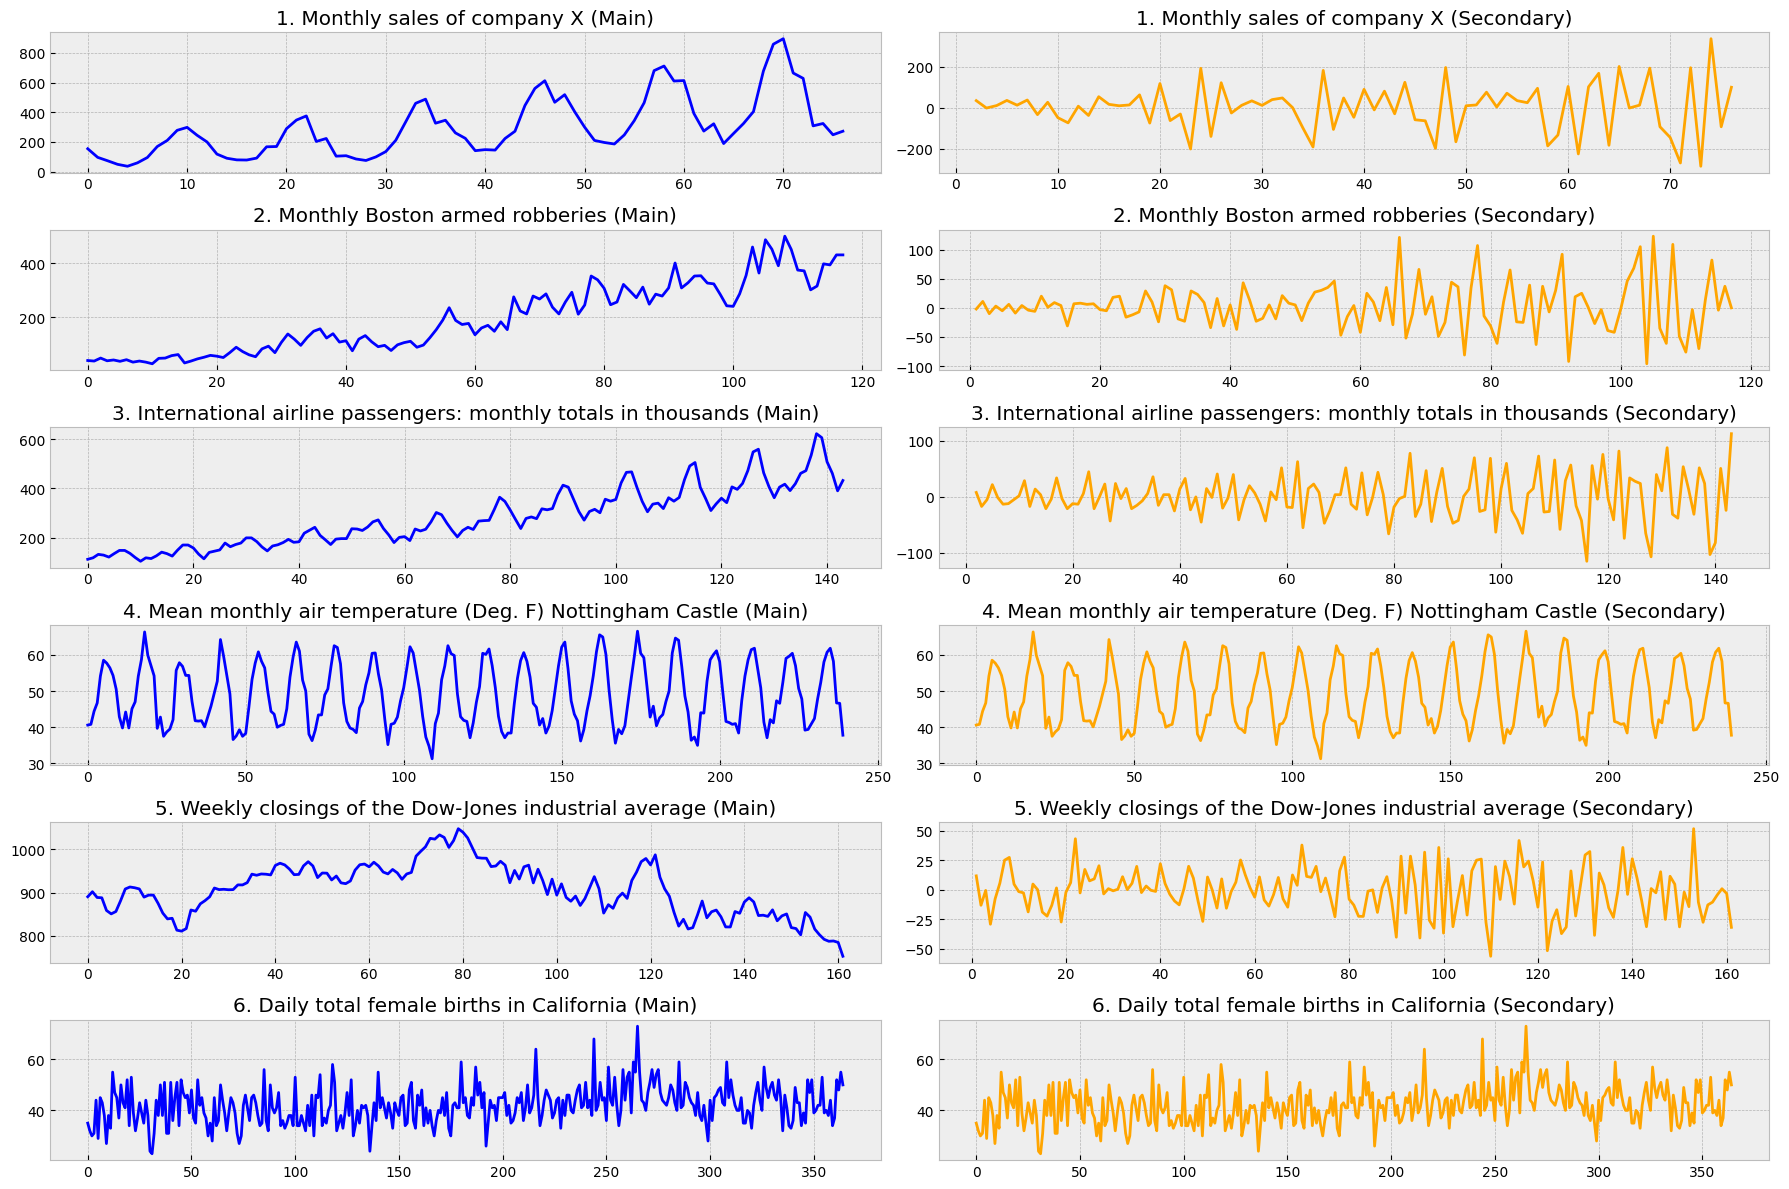

In [230]:
with plt.style.context('bmh'):
    plt.figure(figsize=(18, 12))

    layout = (6, 2)
    k = 1

    for i, key in enumerate(dict_series.keys()):

        ts_ax_main = plt.subplot2grid(layout, (i, 0))
        dict_series_main[key].plot(ax=ts_ax_main, color='blue')
        ts_ax_main.set_title(f'{k}. {key} (Main)')


        ts_ax = plt.subplot2grid(layout, (i, 1))
        dict_series[key].plot(ax=ts_ax, color='orange')
        ts_ax.set_title(f'{k}. {key} (Secondary)')

        k += 1

    plt.tight_layout()
    plt.show()